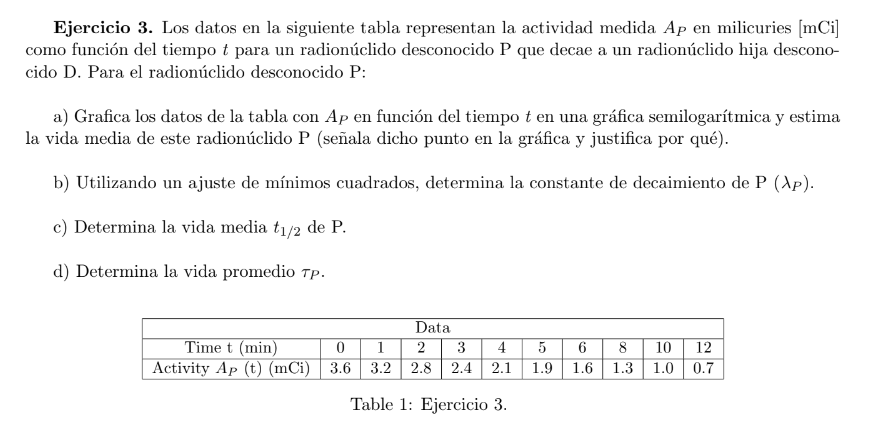

In [5]:
from IPython.display import Image
ruta_imagen = 'C:/Users/abrah/Documents/Documentos/Documents/Documents/Progra/actividad_radionúclido.png'
Image(filename=ruta_imagen)


$a$) Vemos que la ley de decaimiento exponencial nos lleva a describir la actividad del radionúclido $P$ como: $A(t)=A_0 \cdot exp(-\lambda \cdot t)$, que con base a la tabla de datos tenemos:

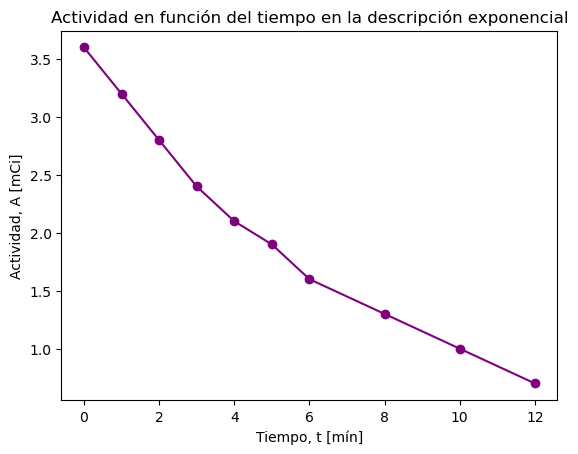

In [6]:
from pylab import *
import math
t = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,12.0]
A_exp = [3.6,3.2,2.8,2.4,2.1,1.9,1.6,1.3,1.0,0.7]
plot(t,A_exp,marker="o", color="purple")
xlabel("Tiempo, t [mín]")
ylabel("Actividad, A [mCi]")
title("Actividad en función del tiempo en la descripción exponencial")
show()

O en su forma logarítmica (es decir, aplicando el $ln$ en ambos lados de la ecuación) obtenemos que: $ln(A(t))=ln(A_0) -\lambda \cdot t$, que con base a la tabla de datos tenemos:

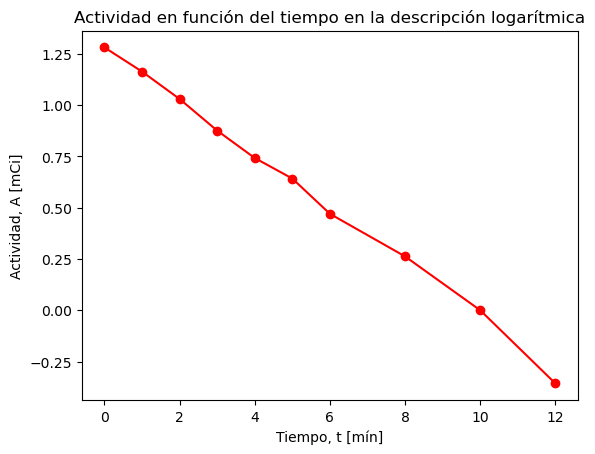

In [8]:
t = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,12.0]
A_log = [math.log(3.6),math.log(3.2),math.log(2.8),math.log(2.4),math.log(2.1),math.log(1.9),math.log(1.6),math.log(1.3),math.log(1.0),math.log(0.7)]
plot(t,A_log,marker="o", color="red")
xlabel("Tiempo, t [mín]")
ylabel("Actividad, A [mCi]")
title("Actividad en función del tiempo en la descripción logarítmica")
show()

Vemos que cuando $t=t_{1/2}$ (vida media), por definición tenemos que $A(t_{1/2})=\frac{1}{2} A_0$. De acuerdo a nuestra tabla, definimos $A(t=0)=A_0=3.6mCi$, por lo que en escala logarítmica tenemos que: $ln(A(t_{1/2}))=ln(\frac{1}{2} \cdot 3.6) \approx 0.59mCi$, observando que este valor anterior está entre el punto donde $ln(A(t=5min))\approx 0.6419mCi$ y $ln(A(t=6min))\approx 0.47mCi$.

Observando los datos que tenemos, tenemos dos puntos de la actividad a un tiempo dado, y tenemos que a un $t_{1/2}$ desconocido, la actividad es aproximadamente $0.59mCi$, por lo que para estimar $t_{1/2}$ haremos un proceso de interpolación lineal como sigue, pues la tendencia de la gráfica semilogarítmica es un comportamiento lineal:

In [9]:
#La variable x vendría a ser el tiempo, mientras que la variable y la actividad en función del tiempo.
def interpolacion_lineal(x1, y1, x2, y2, y_inter):
    # Pendiente entre los puntos.
    m = (y2 - y1) / (x2 - x1)
    
    # Calcular el valor de x_inter para y_inter
    x_inter = ((y_inter - y1) / m) + x1
    
    return x_inter

# Puntos conocidos
x1, y1 = 5, 0.6419
x2, y2 = 6, 0.47

# Valor de y_inter para interpolar
y_inter = 0.59

# Interpolación lineal para encontrar x_inter
x_inter = interpolacion_lineal(x1, y1, x2, y2, y_inter)

print("El valor interpolado de x para y =", y_inter, "es:", x_inter)

El valor interpolado de x para y = 0.59 es: 5.301919720767889


Del procedimiento anterior, una primera estimación de la vida media es que $t_{1/2}\approx 5.302$ minutos, cuya representación gráfica en la forma logarítmica es:

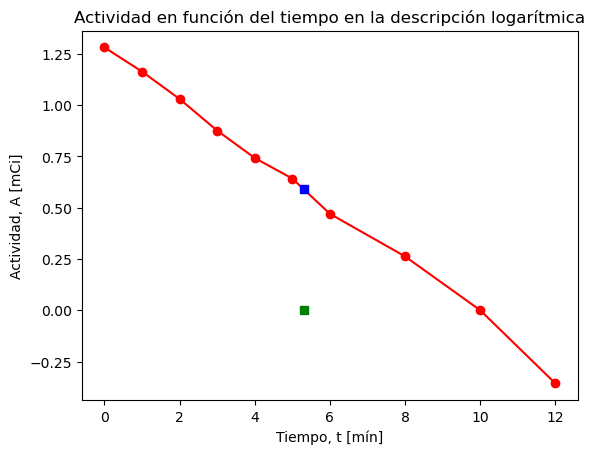

In [10]:
t = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,12.0]
A_log = [math.log(3.6),math.log(3.2),math.log(2.8),math.log(2.4),math.log(2.1),math.log(1.9),math.log(1.6),math.log(1.3),math.log(1.0),math.log(0.7)]
tmedia=[5.302]
a=[0.59]
cero=[0]
plot(t,A_log,marker="o", color="red")
plot(tmedia,a,marker="s",color="blue")
plot(tmedia,cero,marker="s",color="green")
xlabel("Tiempo, t [mín]")
ylabel("Actividad, A [mCi]")
title("Actividad en función del tiempo en la descripción logarítmica")
show()

El punto azul es el punto $ln[A(t=t_{1/2})]$, mientras que el punto verde es el punto en el que el tiempo es igual a la vida media estimada.

$b$) Retomando la ecuación $ln(A(t))=ln(A_0) -\lambda \cdot t$, podemos observar que la pendiente de la recta es $-\lambda$, mientras que $lnA_0$ es el punto de intersección. Realizamos un ajuste lineal por mínimos cuadrados:

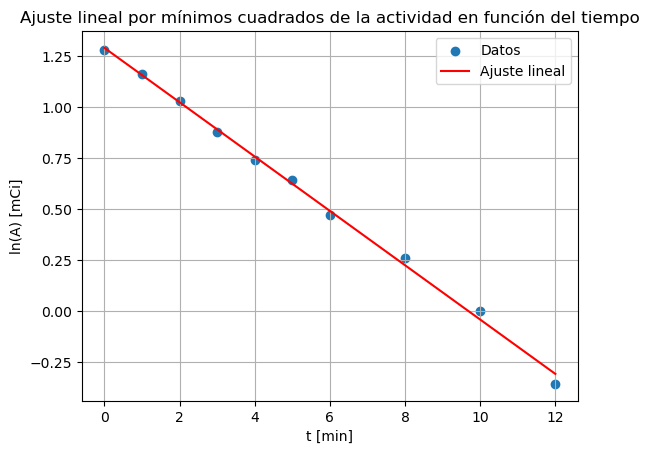

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Definir los datos
t = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0])
A_log = np.array([math.log(3.6), math.log(3.2), math.log(2.8), math.log(2.4), math.log(2.1), math.log(1.9), math.log(1.6), math.log(1.3), math.log(1.0), math.log(0.7)])

# Realizar el ajuste lineal
m, b = np.polyfit(t, A_log, deg=1)

# Crear una función para la línea ajustada
def line(x):
    return m*x + b

# Generar valores para la línea ajustada
t_fit = np.linspace(min(t), max(t), 100)
A_log_fit = line(t_fit)

# Graficar los datos y la línea ajustada
plt.scatter(t, A_log, label='Datos')
plt.plot(t_fit, A_log_fit, 'r-', label='Ajuste lineal')
plt.xlabel('t [min]')
plt.ylabel('ln(A) [mCi]')
plt.title('Ajuste lineal por mínimos cuadrados de la actividad en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#El ajuste anterior arroja los siguientes valores de pendiente e intersección con los datos de t y A_0 ya definidos.
l, A0 = np.polyfit(t, A_log, deg=1)
print("Pendiente (lambda):", l)
print("Intersección:", A0)

Pendiente (lambda): -0.1331137467349497
Intersección: 1.2897458073961505


Por lo que la ecuación lineal, de pendiente $-\lambda$ es: $ln[A(t)]=1.2897458073961505-0.1331137467349497\cdot t$

De lo anterior, la constante de decaimiento del radio núclido P es: $\lambda \approx 0.133 [(minutos)^{-1}]$

$c$) Teniendo la relación entre la vida media y la constante de decaimiento, la vida media del radionúclido está dada por $t_{1/2}=\frac{ln(2)}{\lambda} \Rightarrow t_{1/2}= \frac{ln(2)}{0.133}\approx 5.212 minutos$

d) Vemos que la vida promedio del radionúclido está descrita mediante la relación $tau=\frac{1}{\lambda}=\frac{1}{0.133}\approx 7.52 min$